## LDA, QDA and Logistic Model

### 1. Exploratory Data Analysis

In [1]:
library(ISLR2)
library(tidyverse)
library(ggplot2)

── Attaching packages ───────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
str(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

The dataset **College** is a data frame with 777 observations on the following 18 variables.

+ Private: A factor with levels No and Yes indicating private or public university

+ Apps: Number of applications received

+ Accept: Number of applications accepted

+ Enroll: Number of new students enrolled

+ Top10perc: Pct. new students from top 10% of H.S. class

+ Top25perc: Pct. new students from top 25% of H.S. class

+ F.Undergrad: Number of fulltime undergraduates

+ P.Undergrad: Number of parttime undergraduates

+ Outstate: Out-of-state tuition

+ Room.Board: Room and board costs

+ Books: Estimated book costs

+ Personal: Estimated personal spending

+ PhD: Pct. of faculty with Ph.D.'s

+ Terminal: Pct. of faculty with terminal degree

+ S.F.Ratio: Student/faculty ratio

+ perc.alumni: Pct. alumni who donate

+ Expend: Instructional expenditure per student

+ Grad.Rate: Graduation rate



In [3]:
College %>% count(Private)

Private n  
1 No      212
2 Yes     565

For the factor variable _Private_, there are 212 public universities and 565 private universities in this data set.

#### Side-by-side boxplot

In [5]:
library(reshape2)
df.m = melt(College, id.vars = 'Private')

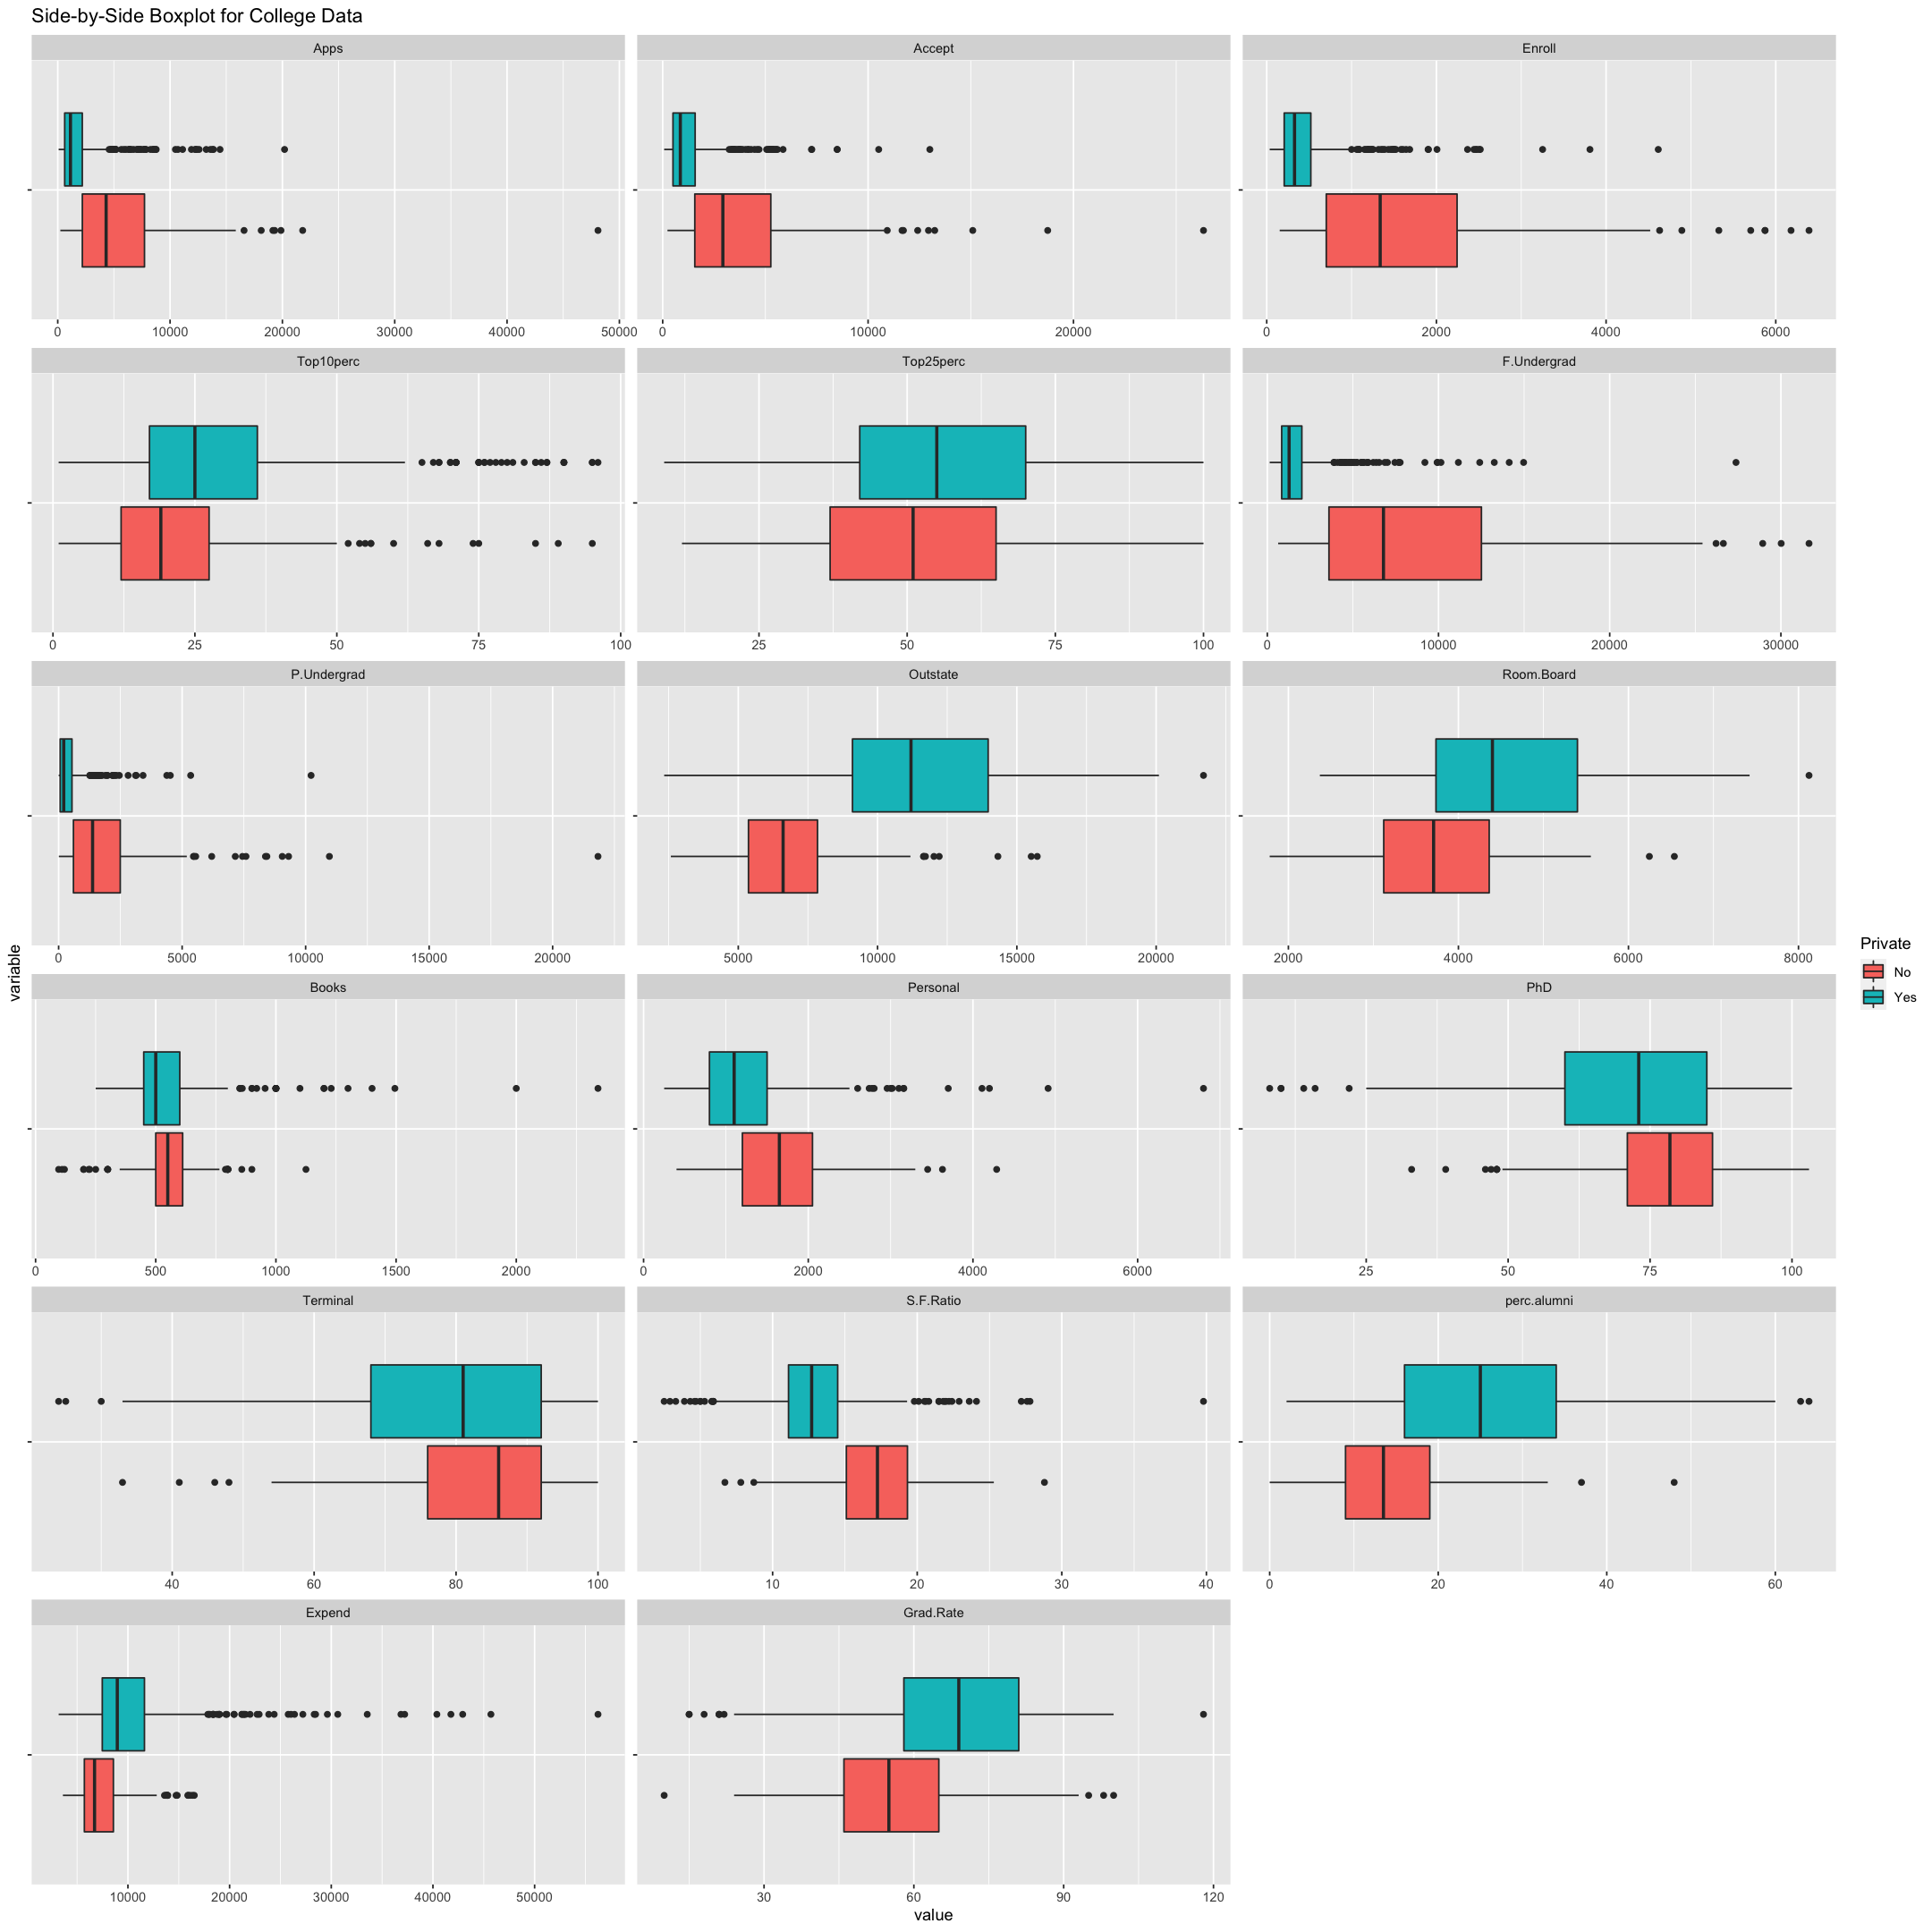

In [6]:
options(repr.plot.width=18, repr.plot.height=18)
df.m %>% ggplot(mapping = aes(x = variable, y = value, fill = Private)) + 
    facet_wrap(~variable, ncol = 3, scales = "free") + 
    geom_boxplot() + 
    coord_flip() + theme(axis.text.y = element_blank()) + 
    ggtitle("Side-by-Side Boxplot for College Data")

It can be seen that each predictors have many outliers for both private and public universities, except for _Top25perc_, _Outstate_, _Room.Board_, _perc.alumni_ and _Grad.Rate_.

More importantly, it can be found that compared with private universities, public universities have higher values for _Apps_, _Accept_, _Enroll_, _F.Undergrad_, _P.Undergrad_, _Books_, _Personal_, _PhD_, _Terminal_, _S.F.Ratio_, but lower values for _Top10perc_, _Top25perc_, _Outstate_, _Room.Board_, _perc.alumni_, _Expend_ and _Grad.Rate_.

#### Parallel Coordinates Plot

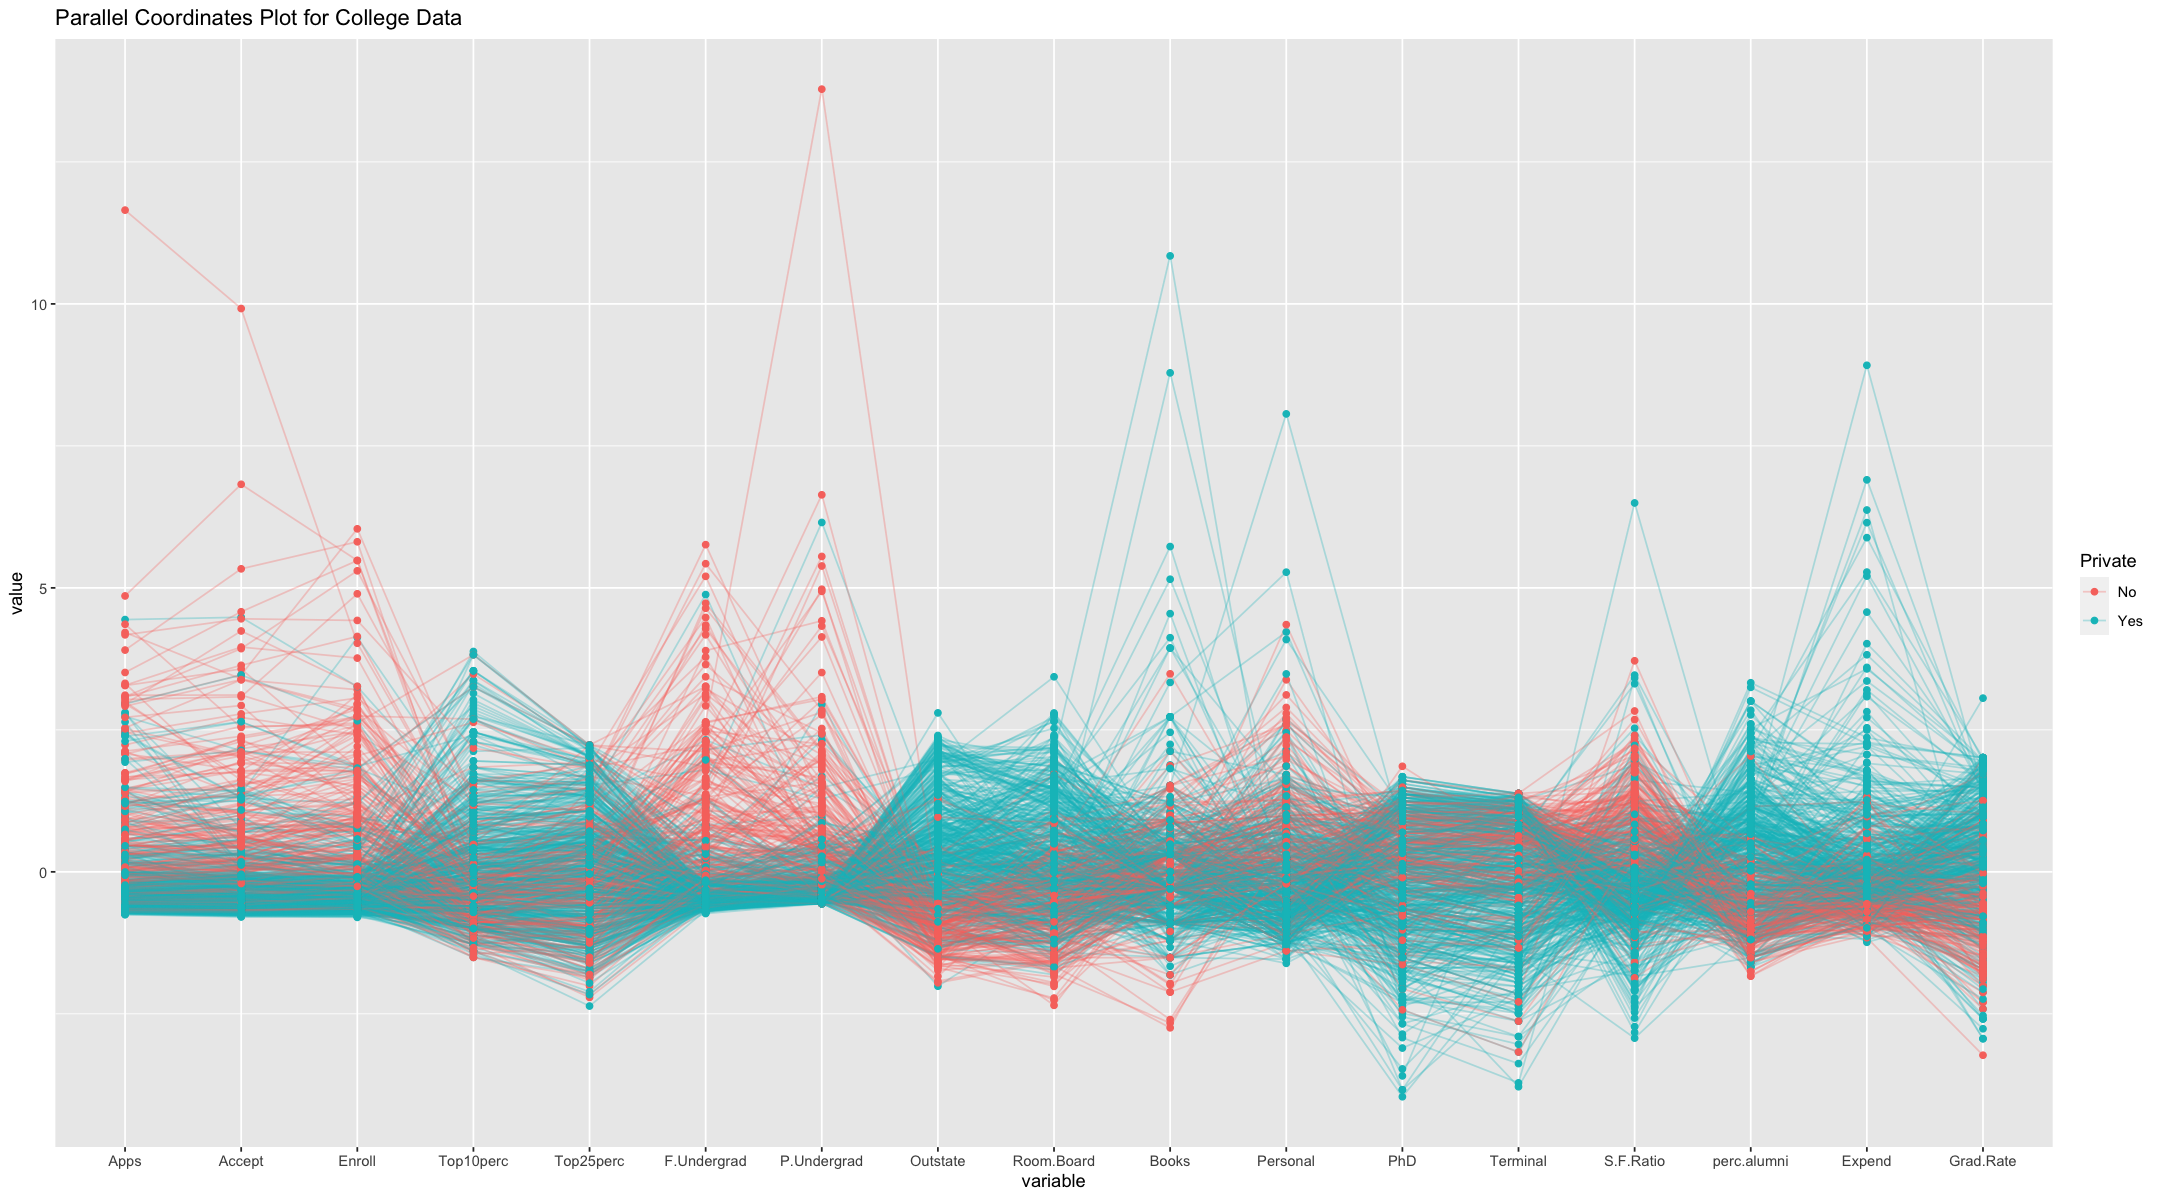

In [8]:
library(GGally)
options(repr.plot.width=18, repr.plot.height=10)
College %>% ggparcoord(columns = 2:ncol(College), groupColumn = 1,
                       showPoints = TRUE, alphaLines = 0.3) + 
    ggtitle("Parallel Coordinates Plot for College Data")

Based on the parallel coordinates plot, if we only use single variable to classify the public university and private university, the predictors _F.Undergrad_, _P.Undergrad_, _Outstate_, _S.F.Ratio_ and _perc.alumni_ seem to work better than others.

#### Distribution of Data and Pairwise Relationship

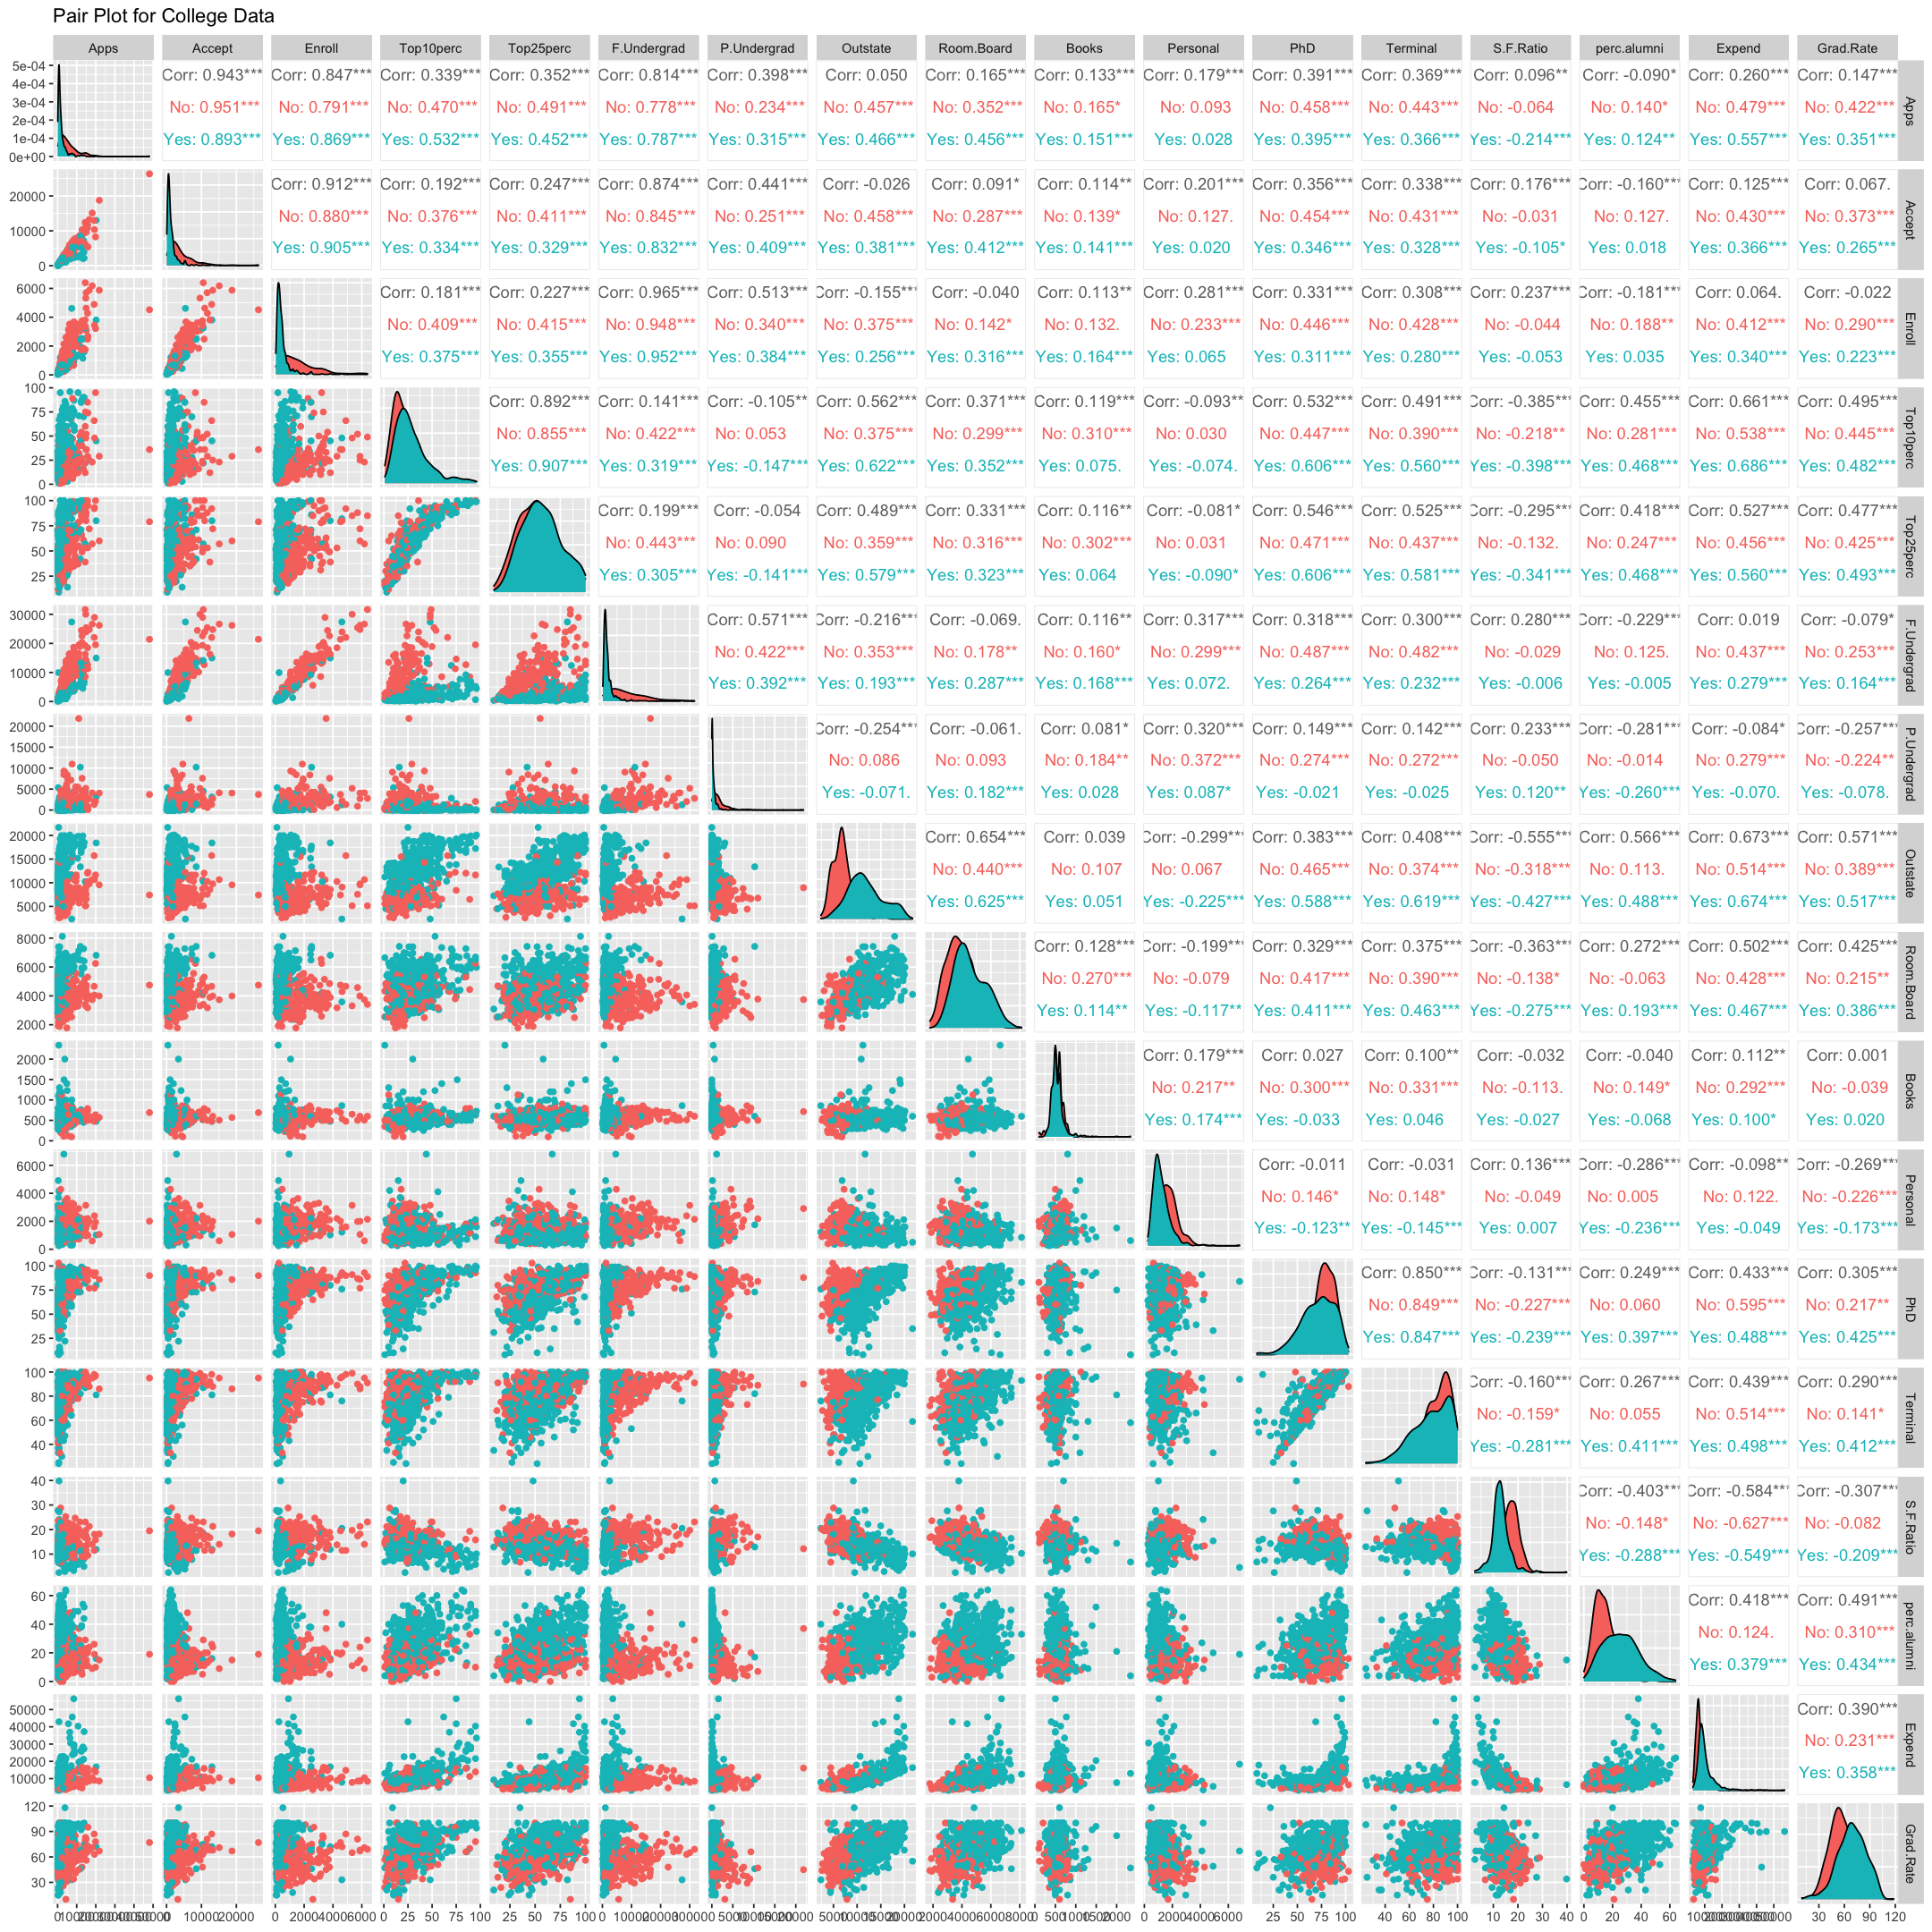

In [9]:
options(repr.plot.width=18, repr.plot.height=18)
College %>% ggpairs(columns = 2:ncol(College), ggplot2::aes(color = Private)) + 
    ggtitle("Pair Plot for College Data")

We can find that:

+ Based on the pairwise scatter plot and correlation values in the upper triangular position of the plot, the correlations between two predictors in the following pairs are pretty large, which is nearly 1 or 0.9, for both private university class and public university class.

    - _Apps_ & _Accept_
    
    - _Apps_ & _Enroll_
    
    - _Top10perc_ & _Top25perc_
    
    - _F.Undergrad_ & _Enroll_
    
    - _PhD_ & _Terminal_



+ Based on the pairwise scatter plot, if we use two predictors to classify the _Private_, the following pairs give a better result than others:

    - _Enroll_ & _Top10perc_
    
    - _Top10perc_ & _F.Undergrad_
    
    - _Enroll_ & _Outstate_
    
    - _Enroll_ & _Room.Board_
    
    - _F.Undergrad_ & _Outstate_
    
    - _F.Undergrad_ & _Room.Board_
    
    - _Enroll_ & _perc.alumni_
    
    - _F.Undergrad_ & _perc.alumni_
    
    - _F.Undergrad_ & _Grad.Rate_
    
    
+ Based on the pairwise scatter plot, the outliers of _P.Undergrad_, _Books_, _Personal_, _S.F.Ratio_ and _Expend_ are more obvious than outliers of other predictors, or in other words, the outliers of these predictors have a extremely larger value.


+ Based on the distribution plot (in the position of diagonal), the distributions of _Apps_, _Accept_, _Enroll_, _Top10perc_, _F.Undergrad_, _P.Undergrad_, _Outstate_ for public university, _Books_, _Personal_, _S.F.Ratio_, _perc.alumni_ for public university and _Expend_ are right-skewed; the distributions of _PhD_ and _Terminal_ are left-skewed.

#### Pairwise Scatter Plot of 2 Predictors to Classify the Private

In this part, I replot the pairwise scattor plot for the 9 pairs of predictors that give better classification result proposed in last part to observe more clearly.

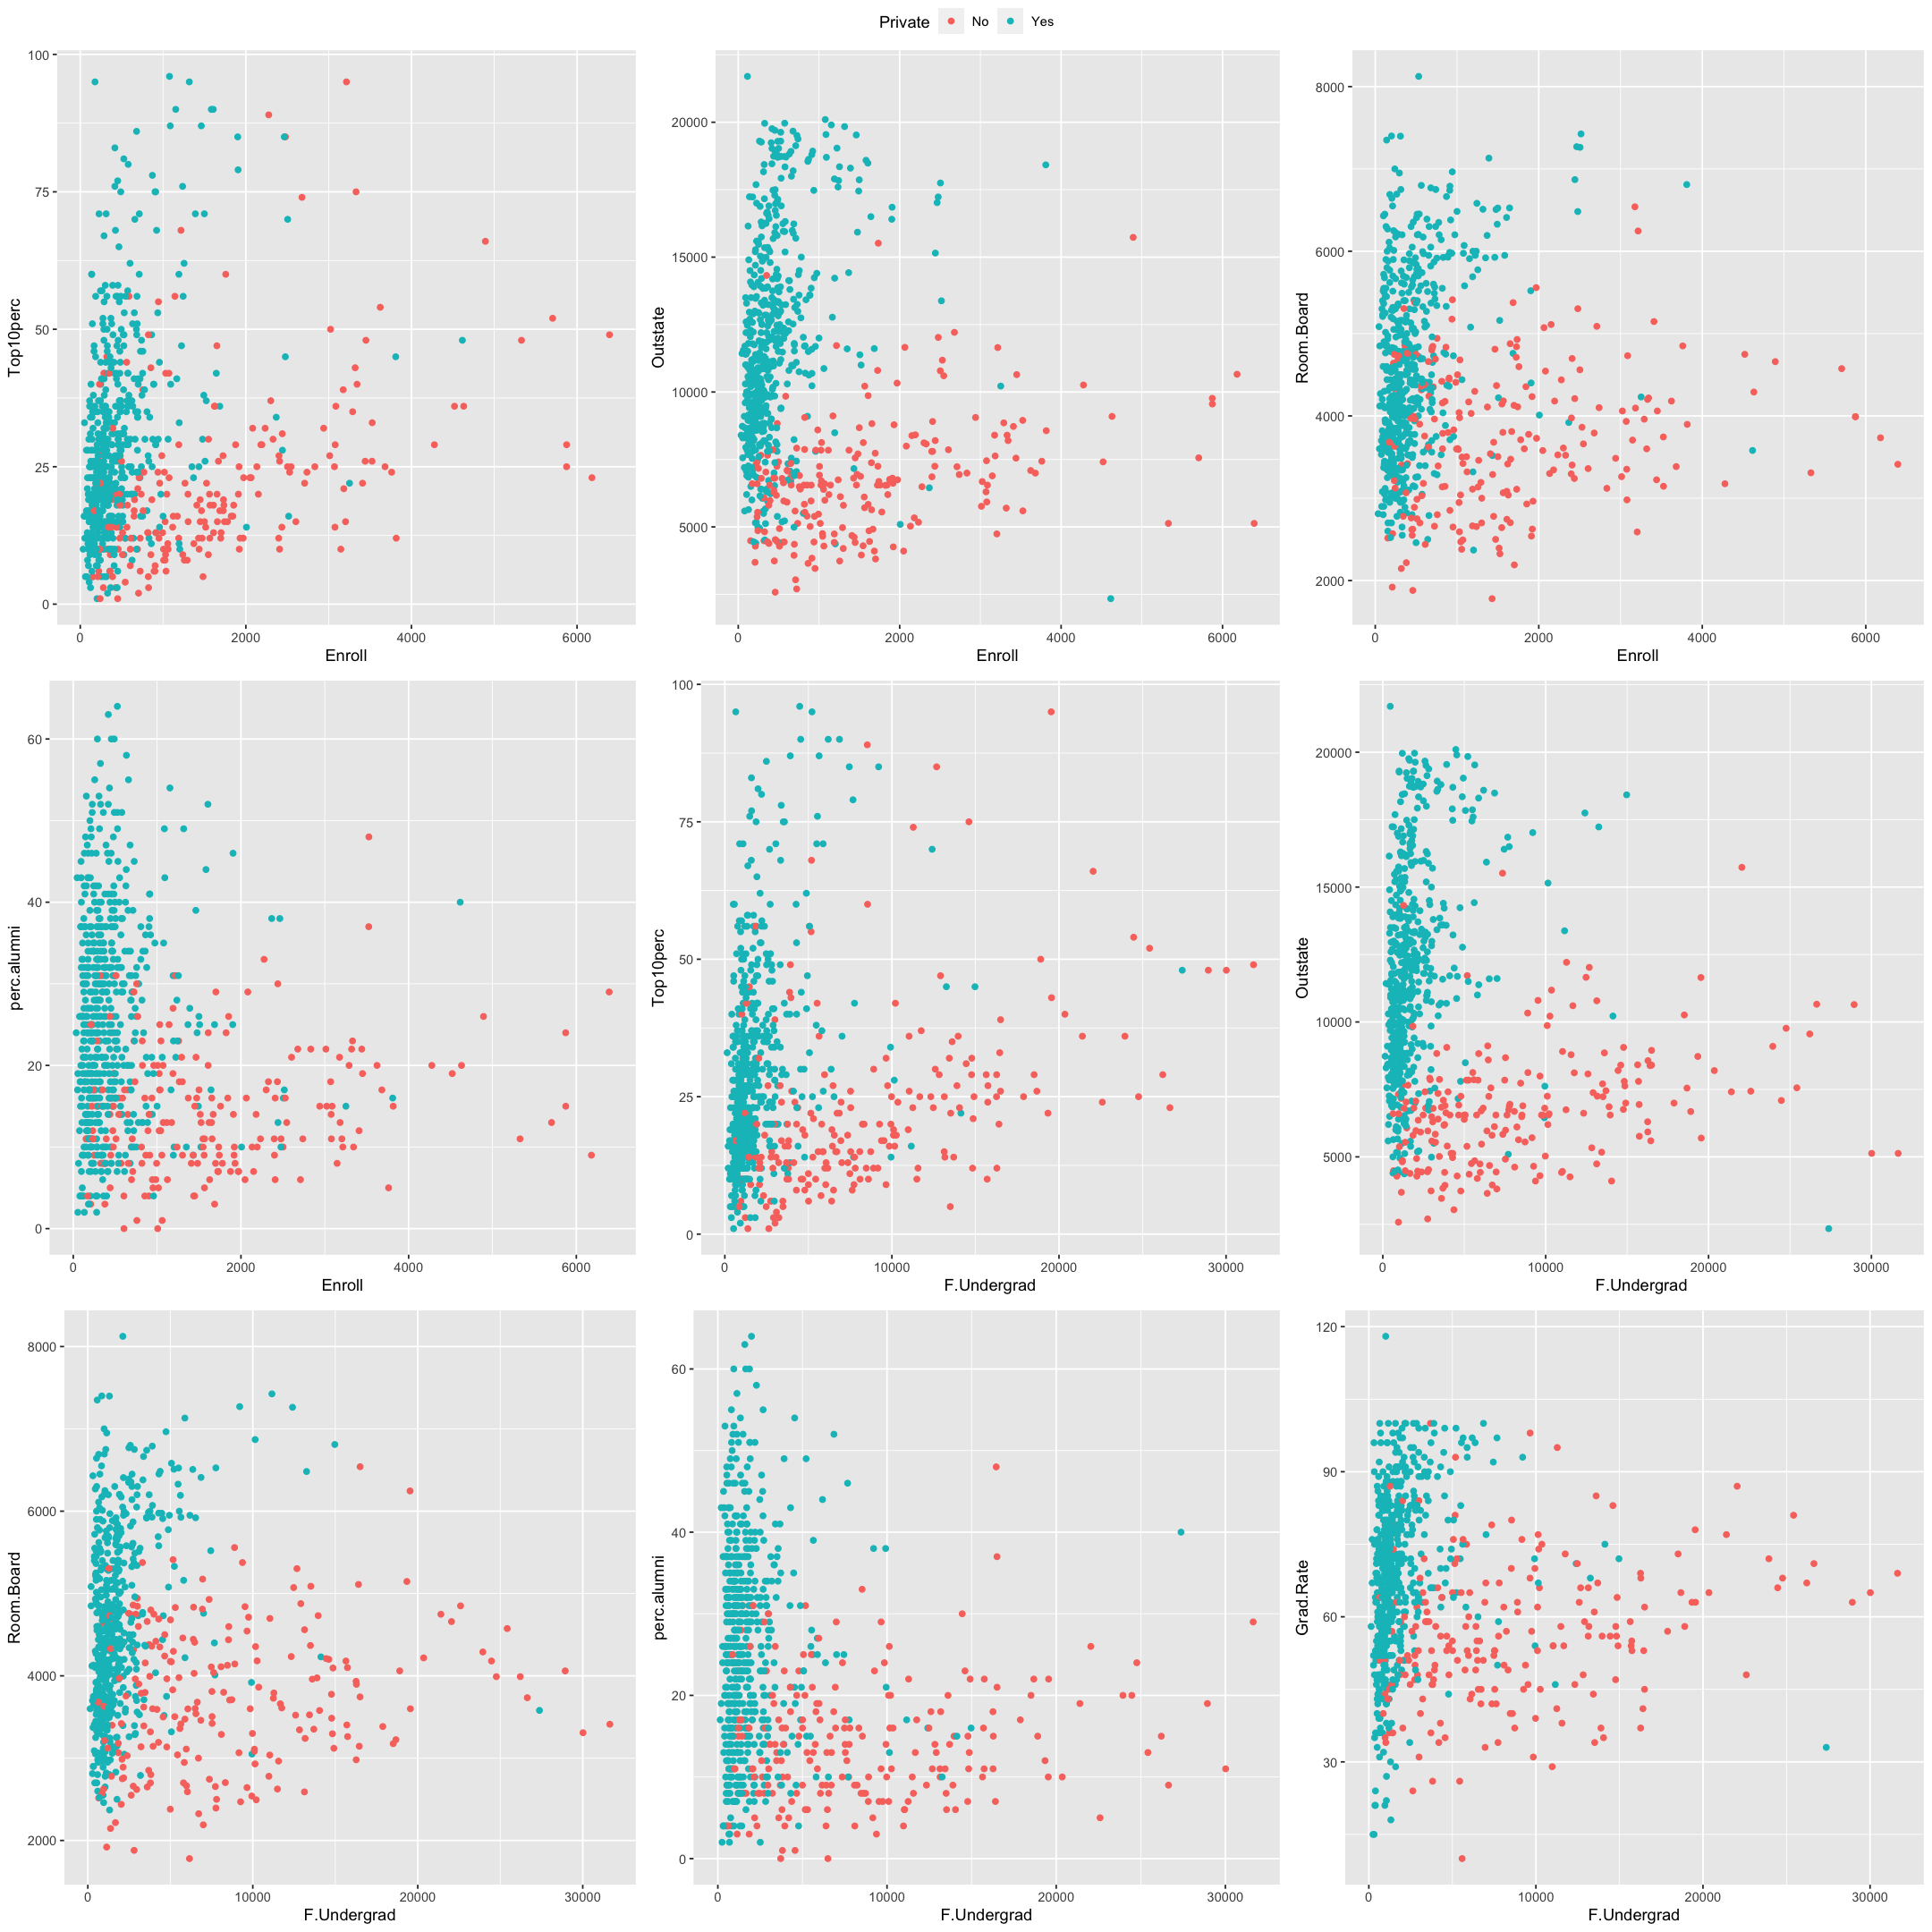

In [10]:
plt1 = ggplot(data = College, mapping = aes(x = Enroll, y = Top10perc, color = Private)) + 
    geom_point()
plt2 = ggplot(data = College, mapping = aes(x = Enroll, y = Outstate, color = Private)) + 
    geom_point()
plt3 = ggplot(data = College, mapping = aes(x = Enroll, y = Room.Board, color = Private)) + 
    geom_point()
plt4 = ggplot(data = College, mapping = aes(x = Enroll, y = perc.alumni, color = Private)) + 
    geom_point()
plt5 = ggplot(data = College, mapping = aes(x = F.Undergrad, y = Top10perc, color = Private)) + 
    geom_point()
plt6 = ggplot(data = College, mapping = aes(x = F.Undergrad, y = Outstate, color = Private)) + 
    geom_point()
plt7 = ggplot(data = College, mapping = aes(x = F.Undergrad, y = Room.Board, color = Private)) + 
    geom_point()
plt8 = ggplot(data = College, mapping = aes(x = F.Undergrad, y = perc.alumni, color = Private)) + 
    geom_point()
plt9 = ggplot(data = College, mapping = aes(x = F.Undergrad, y = Grad.Rate, color = Private)) + 
    geom_point()
library(ggpubr)
ggarrange(plt1, plt2, plt3, plt4, plt5, plt6, plt7, plt8, plt9, ncol = 3, nrow = 3, common.legend = T)

Based on the zoomed-in and more clear pairwise plots above, from my point of persepctive, the pair _Enroll_ vs. _Outstate_ and the pair _F.Undergrad_ vs. _Outstate_ give better classfication of _Private_. Therefore, I will choose one pair from _Enroll_ vs. _Outstate_ and _F.Undergrad_ vs. _Outstate_ to visualize the classification in question 4.

### 2. Model Training

In [11]:
# split the traing and test data
test.perc = 0.2
set.seed(503)
train.index = sample(1:nrow(College), size = ceiling(nrow(College)*(1-test.perc)),replace = FALSE)
train.data = College[train.index, ]
test.data = College[-train.index, ]

In [13]:
library(MASS)

# LDA model
LDA.model = lda(Private~., data = train.data)

# training error
LDA.train.pred = predict(LDA.model, train.data)$class
LDA.train.err = mean(LDA.train.pred != train.data$Private)

# test error
LDA.test.pred = predict(LDA.model, test.data)$class
LDA.test.err = mean(LDA.test.pred != test.data$Private)

# overall error
LDA.all.err = mean(c(LDA.train.pred, LDA.test.pred) != c(train.data$Private, test.data$Private))

In [14]:
# QDA model
QDA.model = qda(Private~., data = train.data)

# training error
QDA.train.pred = predict(QDA.model, train.data)$class
QDA.train.err = mean(QDA.train.pred != train.data$Private)

# test error
QDA.test.pred = predict(QDA.model, test.data)$class
QDA.test.err = mean(QDA.test.pred != test.data$Private)

# overall error
QDA.all.err = mean(c(QDA.train.pred, QDA.test.pred) != c(train.data$Private, test.data$Private))

In [15]:
# how Private is dummyfied by R
contrasts(College$Private)

Yes
No  0  
Yes 1

In [16]:
# Logistic
logit.model = glm(Private~., data = train.data, family = binomial(link = "logit"))

# training error
logit.train.pred = ifelse(predict(logit.model, train.data, type = "response") > 0.5, "Yes", "No")
logit.train.err = mean(logit.train.pred != train.data$Private)

# test error
logit.test.pred = ifelse(predict(logit.model, test.data, type = "response") > 0.5, "Yes", "No")
logit.test.err = mean(logit.test.pred != test.data$Private)

# overall error
logit.all.err = mean(c(logit.train.pred, logit.test.pred) != c(train.data$Private, test.data$Private))

In [17]:
res.err = data.frame(Model = c("LDA", "QDA", "Logistic"),
                     Training_Error = c(LDA.train.err, QDA.train.err, logit.train.err), 
                     Test_Error = c(LDA.test.err, QDA.test.err, logit.test.err),
                     Overall_Error = c(LDA.all.err, QDA.all.err, logit.all.err)
                    )
res.err

Model    Training_Error Test_Error Overall_Error
1 LDA      0.05466238     0.09677419 0.06306306   
2 QDA      0.07877814     0.14838710 0.09266409   
3 Logistic 0.05627010     0.09677419 0.06435006

As shown in the table above, LDA gives the lowest training error, LDA and Logistic gives the same test error, and LDA gives the lowest overall error which combines training and test error. 

Besides, we can find that test errors for all three models are larger than training error, and then of course, the overall errors combining training and test errors for all three models are larger than training error. I think it might be caused by the increase of variance after we apply the test data to the training model.

Overall, based on the training error, test error and overall error, LDA performs best, and then the Logistic model, and at last, QDA model. 

### 3. Visualization

In [18]:
# find the LDA direction
LDA.direction = predict(LDA.model, test.data)$x

#### Classification Visualization of LDA

In [19]:
LDA.test.res = data.frame(LDA.direction = LDA.direction, 
                          Private = test.data[, 1],
                          Prediction = LDA.test.pred
                         )

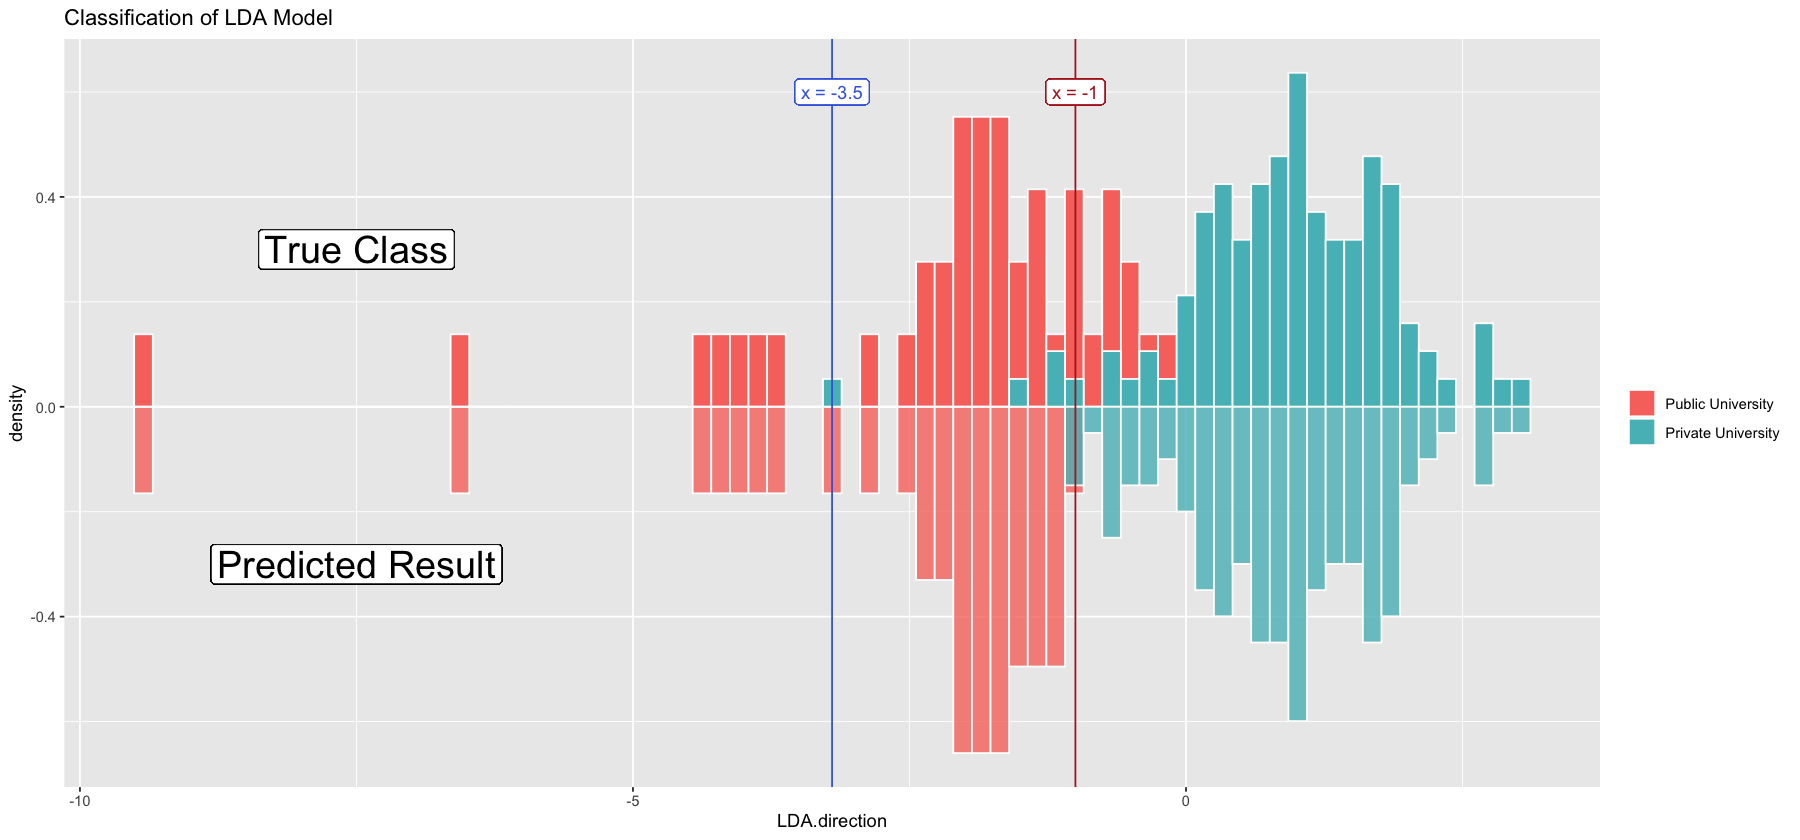

In [20]:
options(repr.plot.width=15, repr.plot.height=7)
LDA.test.res %>% ggplot() + 
    geom_histogram(mapping = aes(x = LDA.direction, y = ..density.., fill = Private), 
                   alpha = 1, bins = 75, position = "identity", color = "white") + 
    geom_label(aes(x = -7.5, y = 0.3, label = "True Class"), size = 8) +
    scale_fill_manual(values = c("#F8766D", "#56BCC2"), name = NULL,
                      breaks = c("No", "Yes"), labels = c("Public University", "Private University")) + 
    geom_histogram(mapping = aes(x = LDA.direction, y = -..density.., fill = Prediction),
                   alpha = 0.8, bins = 75, position = "identity", color = "white") +
    geom_label(aes(x = -7.5, y = -0.3, label = "Predicted Result"), size = 8) + 
    ggtitle("Classification of LDA Model") + 
    geom_vline(aes(xintercept = -1), color = "firebrick") + 
    geom_label(aes(x = -1, y = 0.6, label = "x = -1"), color = "firebrick")+ 
    geom_vline(aes(xintercept = -3.2), color = "royalblue") + 
    geom_label(aes(x = -3.2, y = 0.6, label = "x = -3.5"), color = "royalblue")

From the histogram above, the boundary of this LDA model in LDA direction is around `x = -1`. For the true class labels, the overlapping area is larger than the predicted result and there is a outlier bar at around `x = -3.5`. It makes sense that for the predicted result, the classification are overlapped only around the boundary `x = -1` and the values in the other bins/intervals only give one classification result which matches the true class label well. Outside the overlapping area, the predicted results are highly similar or in other words, almost the same with the true class labels.

#### Classification Visualization of QDA Model

In [21]:
QDA.test.res = data.frame(LDA.direction = LDA.direction, 
                          Private = test.data[, 1],
                          Prediction = QDA.test.pred
                         )

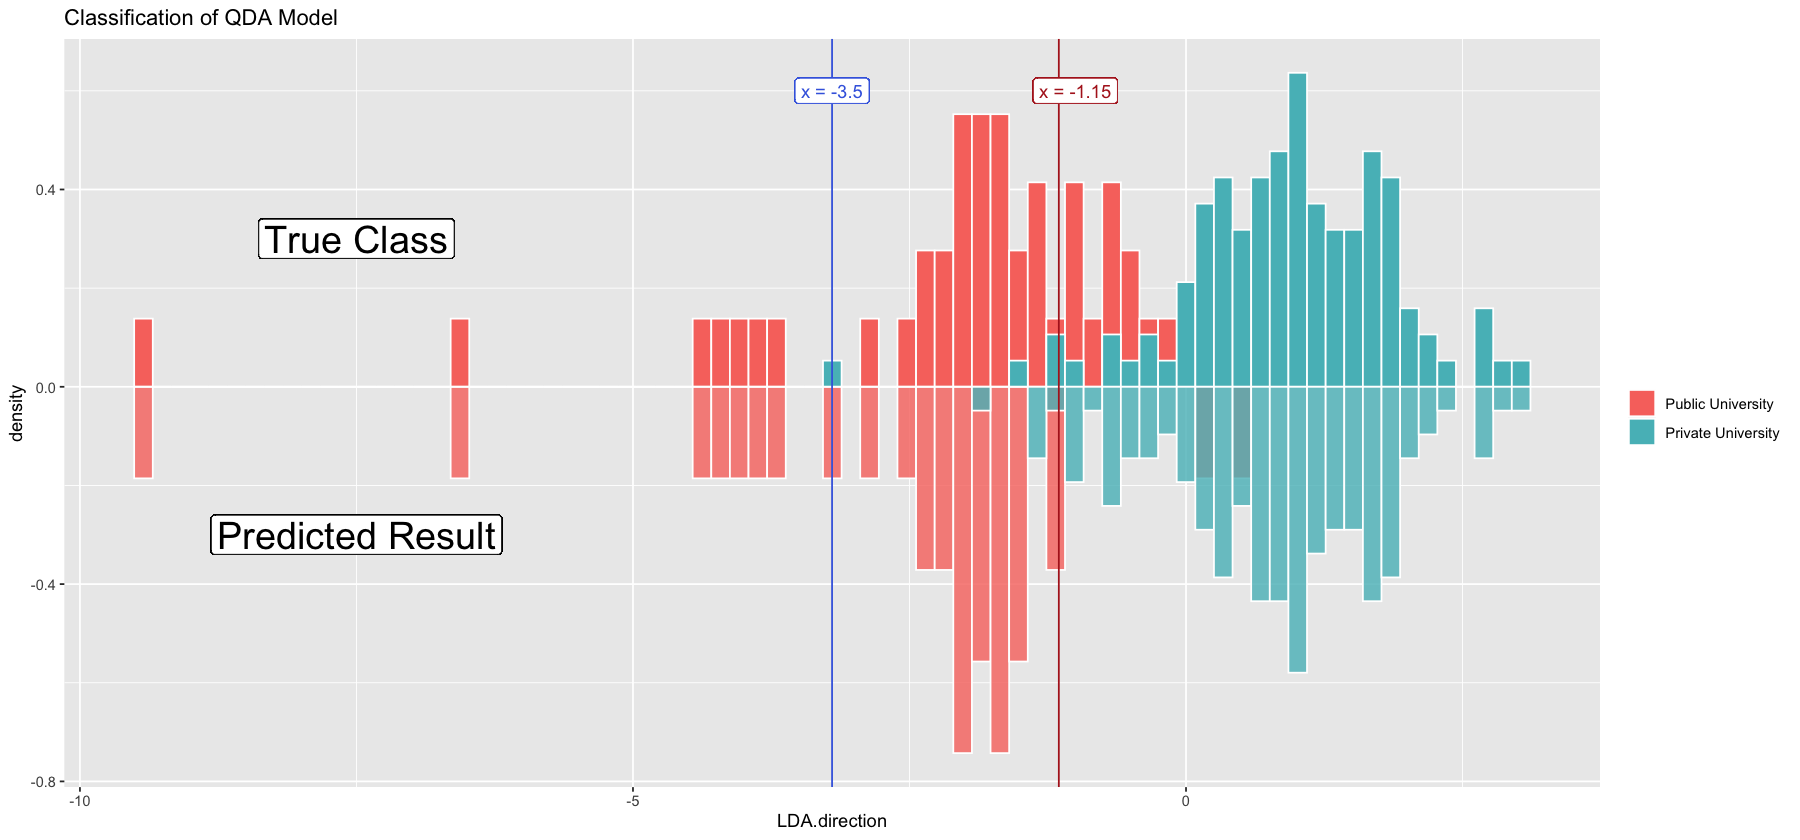

In [22]:
options(repr.plot.width=15, repr.plot.height=7)
QDA.test.res %>% ggplot() + 
    geom_histogram(mapping = aes(x = LDA.direction, y = ..density.., fill = Private), 
                   alpha = 1, bins = 75, position = "identity", color = "white") + 
    geom_label(aes(x = -7.5, y = 0.3, label = "True Class"), size = 8) +
    scale_fill_manual(values = c("#F8766D", "#56BCC2"), name = NULL,
                      breaks = c("No", "Yes"), labels = c("Public University", "Private University")) + 
    geom_histogram(mapping = aes(x = LDA.direction, y = -..density.., fill = Prediction),
                   alpha = 0.8, bins = 75, position = "identity", color = "white") +
    geom_label(aes(x = -7.5, y = -0.3, label = "Predicted Result"), size = 8) + 
    ggtitle("Classification of QDA Model")+ 
    geom_vline(aes(xintercept = -1.15), color = "firebrick") + 
    geom_label(aes(x = -1, y = 0.6, label = "x = -1.15"), color = "firebrick")+ 
    geom_vline(aes(xintercept = -3.2), color = "royalblue") + 
    geom_label(aes(x = -3.2, y = 0.6, label = "x = -3.5"), color = "royalblue")

From the histogram above, the boundary of this QDA model in LDA direction is around `x = -1.15`. For the true class labels, the overlapping area is larger than the predicted result and there is a outlier bar at around `x = -3.5`. However, the performance of predicted results in the LDA direction is not as good as the LDA model. There are some overlaps even outside or even far away from the boundary bin around `x = -1.15`. It might be explaind by the boundary given by QDA are curved and not optimized in the LDA direction.

#### Classification Visualization of Logistic Model

In [23]:
logit.test.res = data.frame(LDA.direction = LDA.direction, 
                            Private = test.data[, 1],
                            Prediction = as.factor(logit.test.pred)
                           )

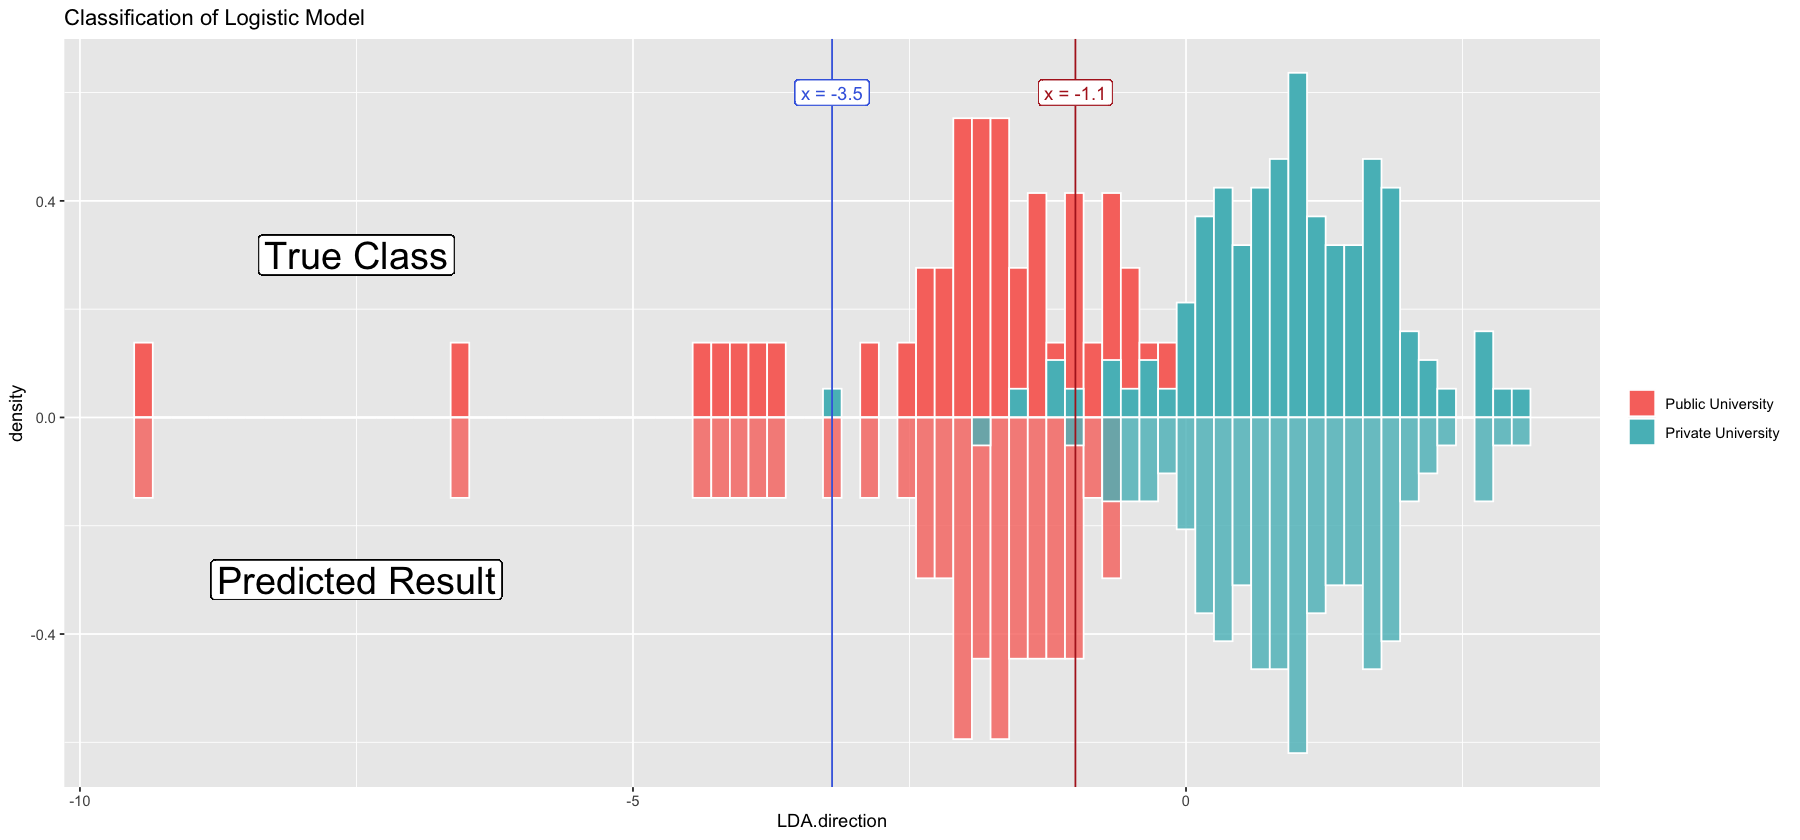

In [24]:
options(repr.plot.width=15, repr.plot.height=7)
logit.test.res %>% ggplot() + 
    geom_histogram(mapping = aes(x = LDA.direction, y = ..density.., fill = Private), 
                   alpha = 1, bins = 75, position = "identity", color = "white") + 
    geom_label(aes(x = -7.5, y = 0.3, label = "True Class"), size = 8) +
    scale_fill_manual(values = c("#F8766D", "#56BCC2"), name = NULL,
                      breaks = c("No", "Yes"), labels = c("Public University", "Private University")) + 
    geom_histogram(mapping = aes(x = LDA.direction, y = -..density.., fill = Prediction),
                   alpha = 0.8, bins = 75, position = "identity", color = "white") +
    geom_label(aes(x = -7.5, y = -0.3, label = "Predicted Result"), size = 8) + 
    ggtitle("Classification of Logistic Model")+ 
    geom_vline(aes(xintercept = -1.), color = "firebrick") + 
    geom_label(aes(x = -1, y = 0.6, label = "x = -1.1"), color = "firebrick")+ 
    geom_vline(aes(xintercept = -3.2), color = "royalblue") + 
    geom_label(aes(x = -3.2, y = 0.6, label = "x = -3.5"), color = "royalblue")

From the histogram above, the boundary of this logistic model in LDA direction is around `x = -1.1`. For the true class labels, the overlapping area is larger than the predicted result and there is a outlier bar at around `x = -3.5`. Again, the performance of predicted results in the LDA direction is not as good as the LDA model, since is LDA is the optimized model along the LDA direction. There are also some overlaps outside the boundary bin around `x = -1.1`. But this logistic model performs better than the QDA model along the LDA direction.

### 4. Visualization 2d

Based on the scatter plot in pair-plot we got in question 1, _Outstate_ and _F.Undergrad_ seem good to separate the public university and private university. So, in the following graphs, I choose to plot the test data with _Outstate_ as x-aixs and _F.Undergrad_ as y-axis.

#### Classification of LDA Model

In [25]:
LDA.variable.res = data.frame(Outstate = test.data[, "Outstate"], 
                              F.Undergrad = test.data[, "F.Undergrad"],
                              Private = test.data[, 1], Prediction = LDA.test.pred
                              )

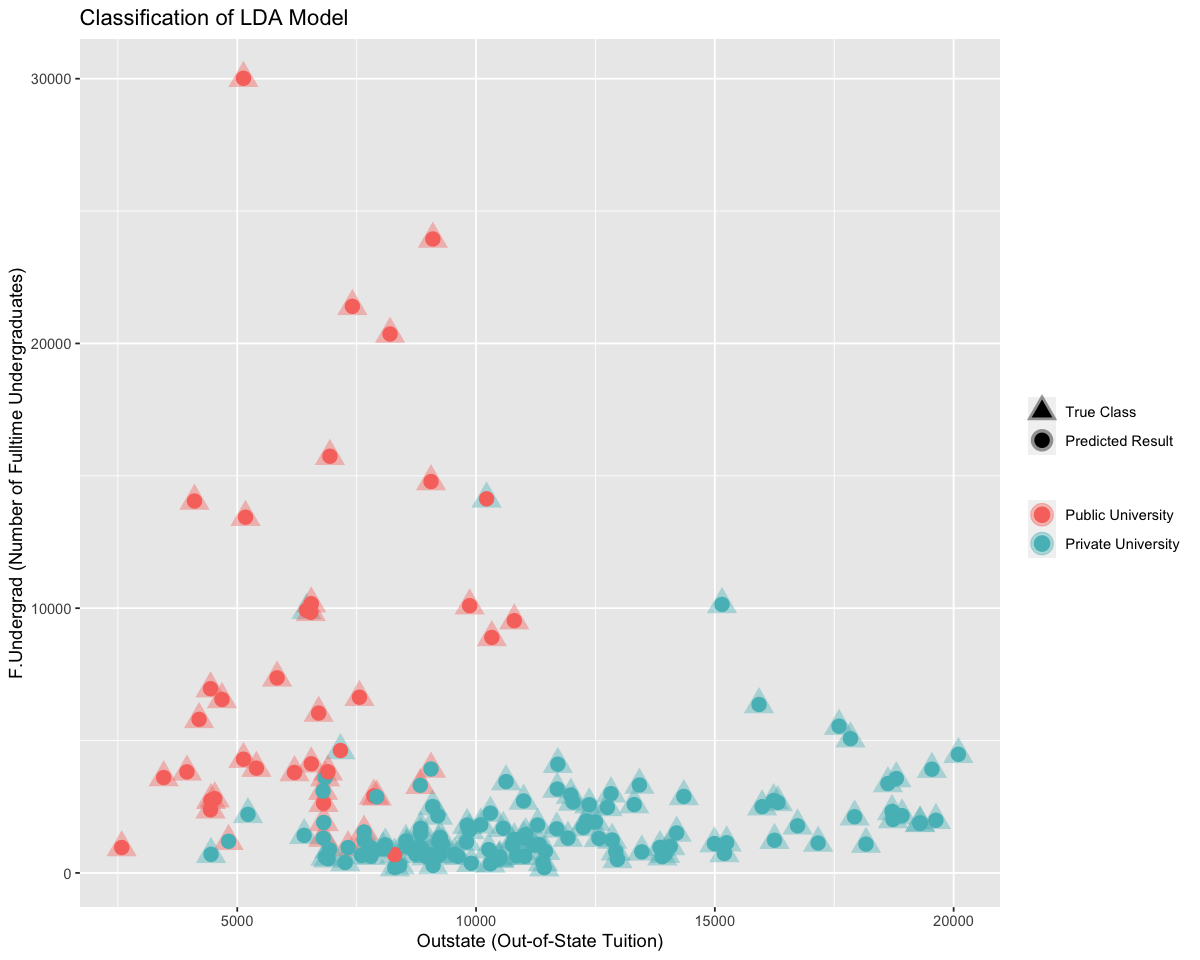

In [26]:
options(repr.plot.width=10, repr.plot.height=8)
LDA.variable.res %>% ggplot() +
    geom_point(mapping = aes(x = Outstate, y = F.Undergrad, color = Private, shape = "triangle"), 
               alpha = 0.4, size = 6) + 
    geom_point(mapping = aes(x = Outstate, y = F.Undergrad, color = Prediction, shape = "circle"), 
               alpha = 1, size = 4) + 
    scale_color_manual(values = c("#F8766D", "#56BCC2"), name = NULL,
                       breaks = c("No", "Yes"), labels = c("Public University", "Private University")
                      ) + 
    scale_shape_manual(values = c(17, 16), name = NULL,
                       breaks = c("triangle", "circle"), labels = c("True Class", "Predicted Result")
                      ) +
    xlab("Outstate (Out-of-State Tuition)") + 
    ylab("F.Undergrad (Number of Fulltime Undergraduates)") + 
    ggtitle("Classification of LDA Model")

It can be found that there are some misclassification case in the overlapping area. Outside the overlapping area, almost all the cases (except an strange point close to the group of Public but with Private label) are predicted correctly.

#### Classification of QDA Model

In [27]:
QDA.variable.res = data.frame(Outstate = test.data[, "Outstate"], 
                              F.Undergrad = test.data[, "F.Undergrad"],
                              Private = test.data[, 1], Prediction = QDA.test.pred
                              )

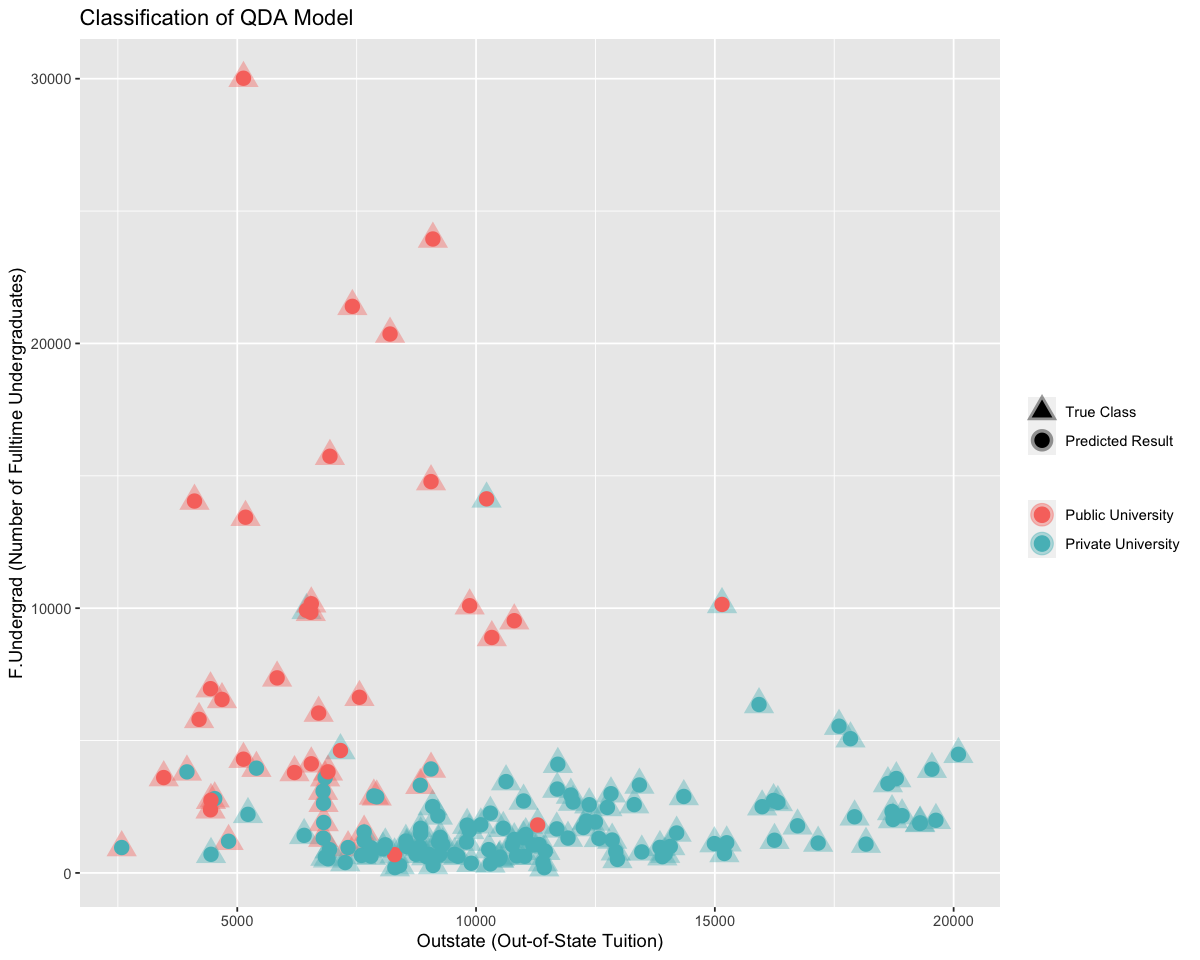

In [28]:
options(repr.plot.width=10, repr.plot.height=8)
QDA.variable.res %>% ggplot() +
    geom_point(mapping = aes(x = Outstate, y = F.Undergrad, color = Private, shape = "triangle"), 
               alpha = 0.4, size = 6) + 
    geom_point(mapping = aes(x = Outstate, y = F.Undergrad, color = Prediction, shape = "circle"), 
               alpha = 1, size = 4) + 
    scale_color_manual(values = c("#F8766D", "#56BCC2"), name = NULL,
                       breaks = c("No", "Yes"), labels = c("Public University", "Private University")
                      ) + 
    scale_shape_manual(values = c(17, 16), name = NULL,
                       breaks = c("triangle", "circle"), labels = c("True Class", "Predicted Result")
                      ) +
    xlab("Outstate (Out-of-State Tuition)") + 
    ylab("F.Undergrad (Number of Fulltime Undergraduates)") + 
    ggtitle("Classification of QDA Model")

It can be found that there are some misclassification case in the overlapping area. Outside the overlapping area, almost all the cases are predicted correctly (there is an strange point close to the group of Public but with Private label, and none of these three models can predict it correctly) but there are a little bit more misclassification cases than LDA model.

#### Classification of Logistic Model

In [29]:
logit.variable.res = data.frame(Outstate = test.data[, "Outstate"], 
                                F.Undergrad = test.data[, "F.Undergrad"],
                                Private = test.data[, 1], Prediction = as.factor(logit.test.pred)
                                )

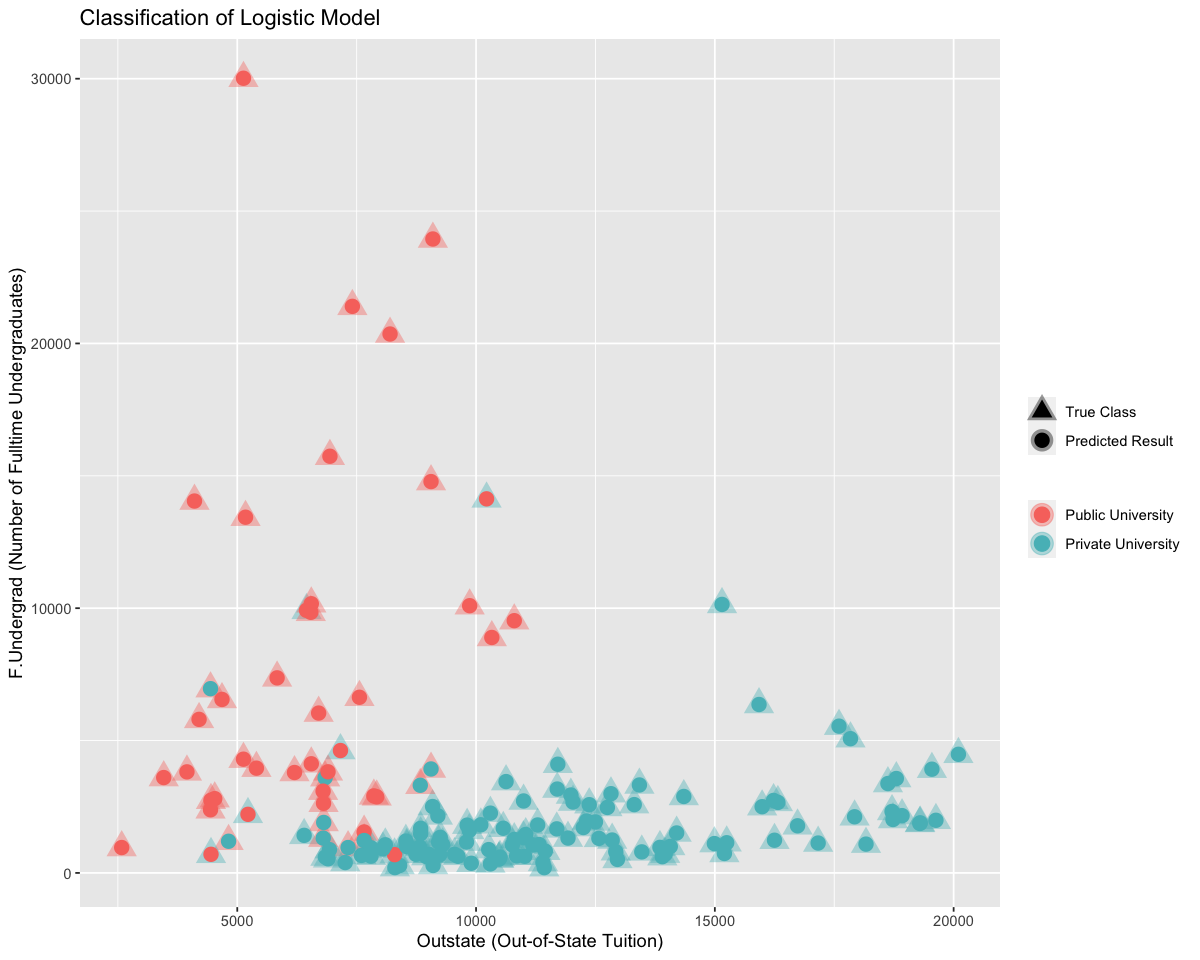

In [30]:
options(repr.plot.width=10, repr.plot.height=8)
logit.variable.res %>% ggplot() +
    geom_point(mapping = aes(x = Outstate, y = F.Undergrad, color = Private, shape = "triangle"), 
               alpha = 0.4, size = 6) + 
    geom_point(mapping = aes(x = Outstate, y = F.Undergrad, color = Prediction, shape = "circle"), 
               alpha = 1, size = 4) + 
    scale_color_manual(values = c("#F8766D", "#56BCC2"), name = NULL,
                       breaks = c("No", "Yes"), labels = c("Public University", "Private University")
                      ) + 
    scale_shape_manual(values = c(17, 16), name = NULL,
                       breaks = c("triangle", "circle"), labels = c("True Class", "Predicted Result")
                      ) +
    xlab("Outstate (Out-of-State Tuition)") + 
    ylab("F.Undergrad (Number of Fulltime Undergraduates)") + 
    ggtitle("Classification of Logistic Model")

It can be found that there are some misclassification case in the overlapping area. Outside the overlapping area, almost all the cases (there is an strange point close to the group of Public but with Private label, and none of these three models can predict it correctly) are predicted correctly and the misclassification cases are similar to LDA model.

### 5. Classification Boundary Visualization

In [31]:
# generate a grid of Outstate and F.Undergrad
OS = seq(from = 0, to = 20000, length = 500)
FU = seq(from = 0, to = 30000, length = 500)
grid = expand.grid(OS, FU)
grid.2var = data.frame(Outstate = grid[, 1], F.Undergrad = grid[, 2])

In [32]:
# generate a grid of all predictors in College
grid.full = data.frame(Outstate = grid[, 1], F.Undergrad = grid[, 2])
other.vars = colnames(College)[which(colnames(College)!="Outstate"&
                                     colnames(College)!="F.Undergrad"&
                                     colnames(College)!="Private"
                                    )]
for (var in other.vars){
    grid.full[, var] = rep(mean(College[, var]), length(OS)*length(FU))
}

#### Classification & Boundary of LDA Model Fitted on Outstate and F.Undergrad

In [33]:
# LDA model fitted on Outstate and F.Undergrad
LDA.2var.model = lda(Private ~ Outstate + F.Undergrad, data = train.data)

# predict the classficication results on the grid 
LDA.2var.pred.grid = predict(LDA.2var.model, grid.2var)$class
LDA.full.pred.grid = predict(LDA.model, grid.full)$class

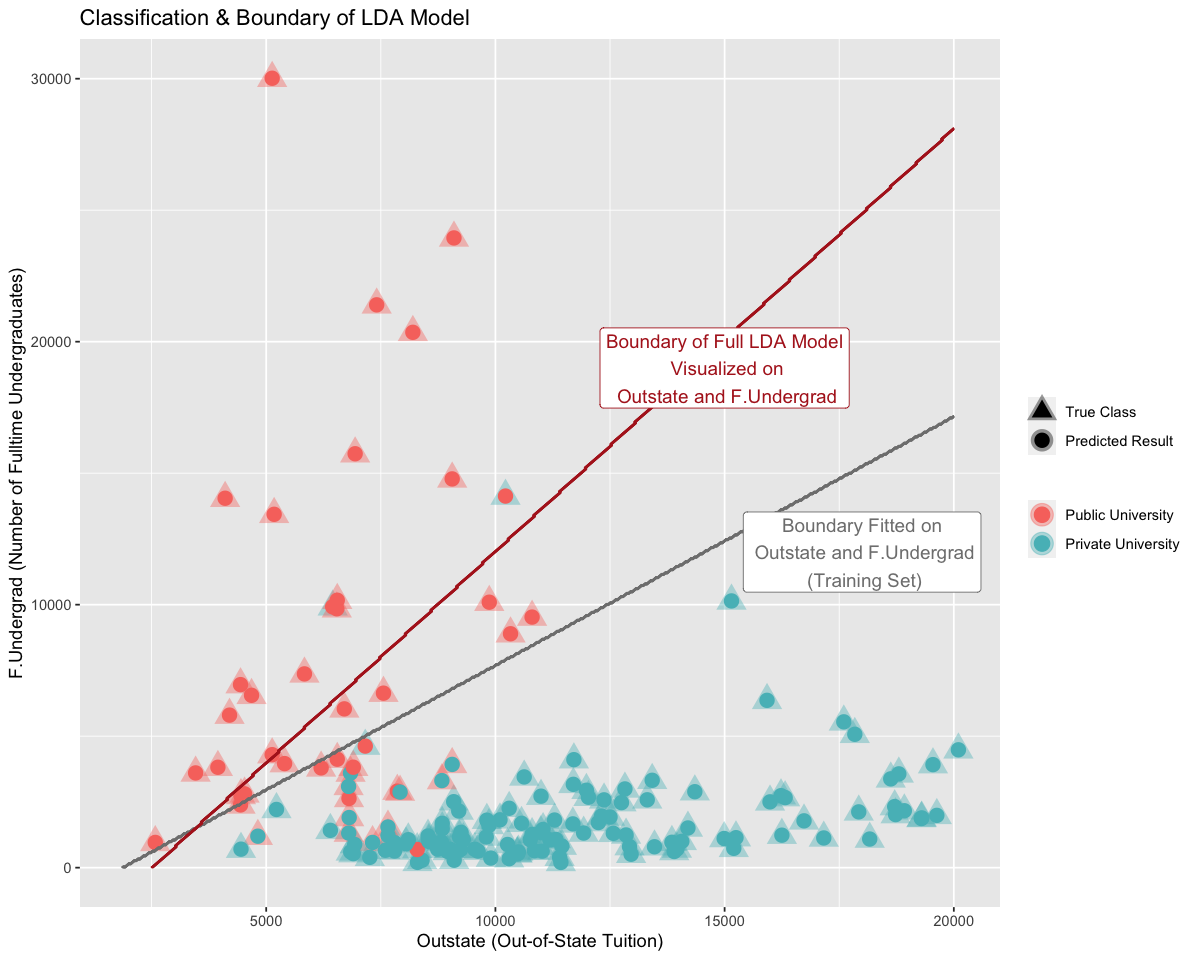

In [34]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot() +
    geom_point(data = LDA.variable.res, 
               mapping = aes(x = Outstate, y = F.Undergrad, color = Private, shape = "triangle"), 
               alpha = 0.4, size = 6) + 
    geom_point(data = LDA.variable.res, 
               mapping = aes(x = Outstate, y = F.Undergrad, color = Prediction, shape = "circle"), 
               alpha = 1, size = 4) + 
    scale_color_manual(values = c("#F8766D", "#56BCC2"), name = NULL,
                       breaks = c("No", "Yes"), labels = c("Public University", "Private University")
                      ) + 
    scale_shape_manual(values = c(17, 16), name = NULL,
                       breaks = c("triangle", "circle"), labels = c("True Class", "Predicted Result")
                      ) +
    xlab("Outstate (Out-of-State Tuition)") + 
    ylab("F.Undergrad (Number of Fulltime Undergraduates)") + 
    geom_contour(mapping = aes(x = grid.2var$Outstate, y = grid.2var$F.Undergrad, 
                               z = as.numeric(LDA.2var.pred.grid)),
                 color = "gray50") + 
    geom_label(aes(x = 18000, y = 12000, 
                   label = "Boundary Fitted on\n Outstate and F.Undergrad\n (Training Set)"), 
               color = "gray50", size = 4) + 
    geom_contour(mapping = aes(x = grid.full$Outstate, y = grid.full$F.Undergrad, 
                               z = as.numeric(LDA.full.pred.grid)),
                 color = "firebrick") + 
    geom_label(aes(x = 15000, y = 19000, 
                   label = "Boundary of Full LDA Model\n Visualized on\n Outstate and F.Undergrad"), 
               color = "firebrick", size = 4) + 
    ggtitle("Classification & Boundary of LDA Model")

We can see that there are some points labeled red lying right-hand side of the LDA boundary. It might be caused by that the boundary hyperplane is not orthogonal to the Outstate-F.Undergrad plane. 

#### Classification & Boundary of QDA Model Fitted on Outstate and F.Undergrad

In [35]:
# QDA model fitted on Outstate and F.Undergrad
QDA.2var.model = qda(Private ~ Outstate + F.Undergrad, data = train.data)

# predict the classficication results on the grid 
QDA.2var.pred.grid = predict(QDA.2var.model, grid.2var)$class
QDA.full.pred.grid = predict(QDA.model, grid.full)$class

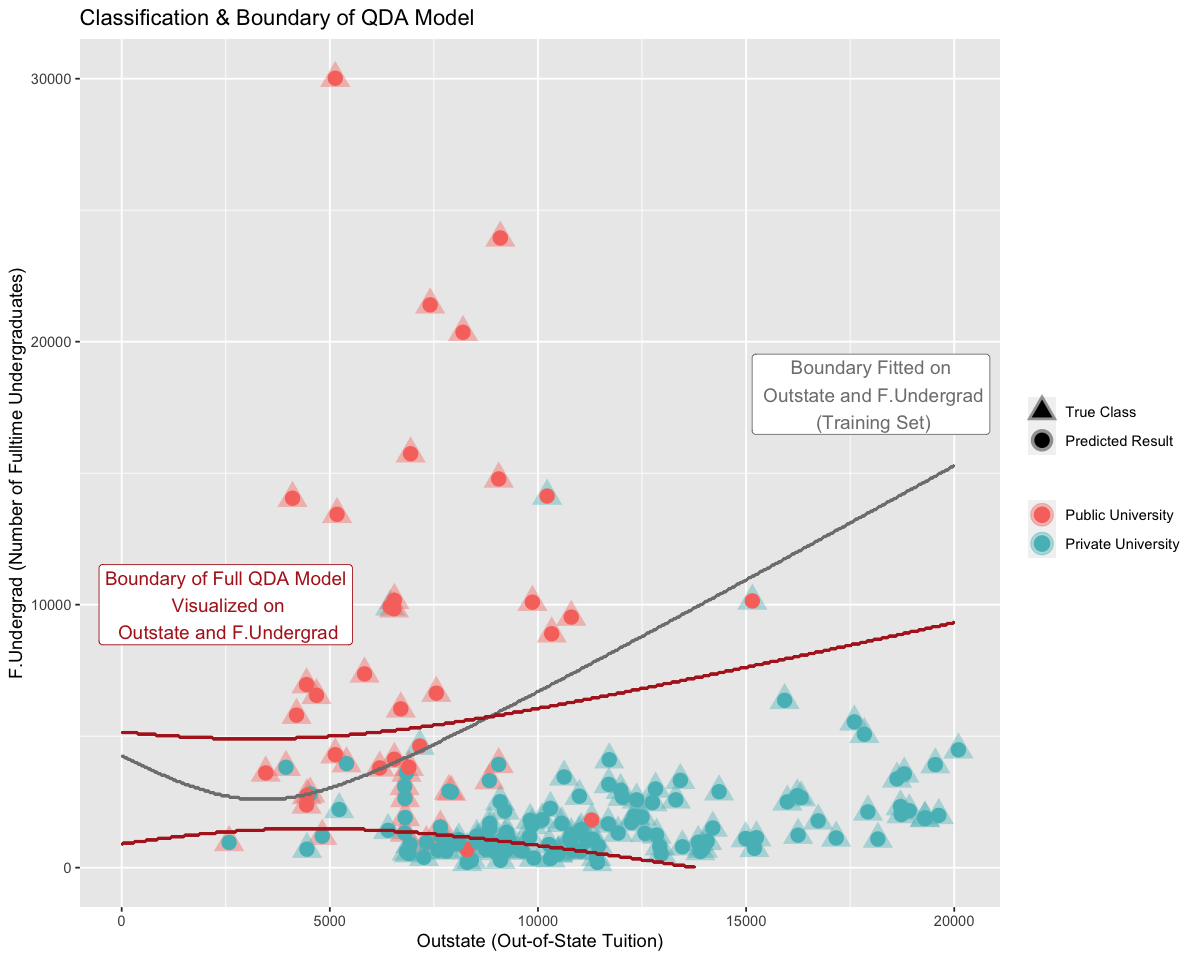

In [36]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot() +
    geom_point(data = QDA.variable.res, 
               mapping = aes(x = Outstate, y = F.Undergrad, color = Private, shape = "triangle"), 
               alpha = 0.4, size = 6) + 
    geom_point(data = QDA.variable.res, 
               mapping = aes(x = Outstate, y = F.Undergrad, color = Prediction, shape = "circle"), 
               alpha = 1, size = 4) + 
    scale_color_manual(values = c("#F8766D", "#56BCC2"), name = NULL,
                       breaks = c("No", "Yes"), labels = c("Public University", "Private University")
                      ) + 
    scale_shape_manual(values = c(17, 16), name = NULL,
                       breaks = c("triangle", "circle"), labels = c("True Class", "Predicted Result")
                      ) +
    xlab("Outstate (Out-of-State Tuition)") + 
    ylab("F.Undergrad (Number of Fulltime Undergraduates)") + 
    geom_contour(mapping = aes(x = grid.2var$Outstate, y = grid.2var$F.Undergrad, 
                               z = as.numeric(QDA.2var.pred.grid)),
                 color = "gray50") + 
    geom_label(aes(x = 18000, y = 18000, 
                   label = "Boundary Fitted on\n Outstate and F.Undergrad\n (Training Set)"), 
               color = "gray50", size = 4) + 
    geom_contour(mapping = aes(x = grid.full$Outstate, y = grid.full$F.Undergrad, 
                               z = as.numeric(QDA.full.pred.grid)),
                 color = "firebrick") + 
    geom_label(aes(x = 2500, y = 10000, 
                   label = "Boundary of Full QDA Model\n Visualized on\n Outstate and F.Undergrad"), 
               color = "firebrick", size = 4) + 
    ggtitle("Classification & Boundary of QDA Model")

Similar to the boundary of LDA, the predicted results are not all consistent to the QDA boundary. It might be also caused by that the boundary hypersurface are not a hyperplane orthogonal to the Outstate-F.Undergrad plane.

#### Classification & Boundary of Logistic Model Fitted on Outstate and F.Undergrad

In [37]:
# logistic model fitted on Outstate and F.Undergrad
logit.2var.model = glm(Private ~ Outstate + F.Undergrad, data = train.data, 
                       family = binomial(link = "logit"))

# predict the classficication results on the grid 
logit.2var.pred.grid = as.factor(ifelse(predict(logit.2var.model, grid.2var, type = "response") > 0.5, 
                                        "Yes", "No"))
logit.full.pred.grid = as.factor(ifelse(predict(logit.model, grid.full, type = "response") > 0.5, 
                                        "Yes", "No"))

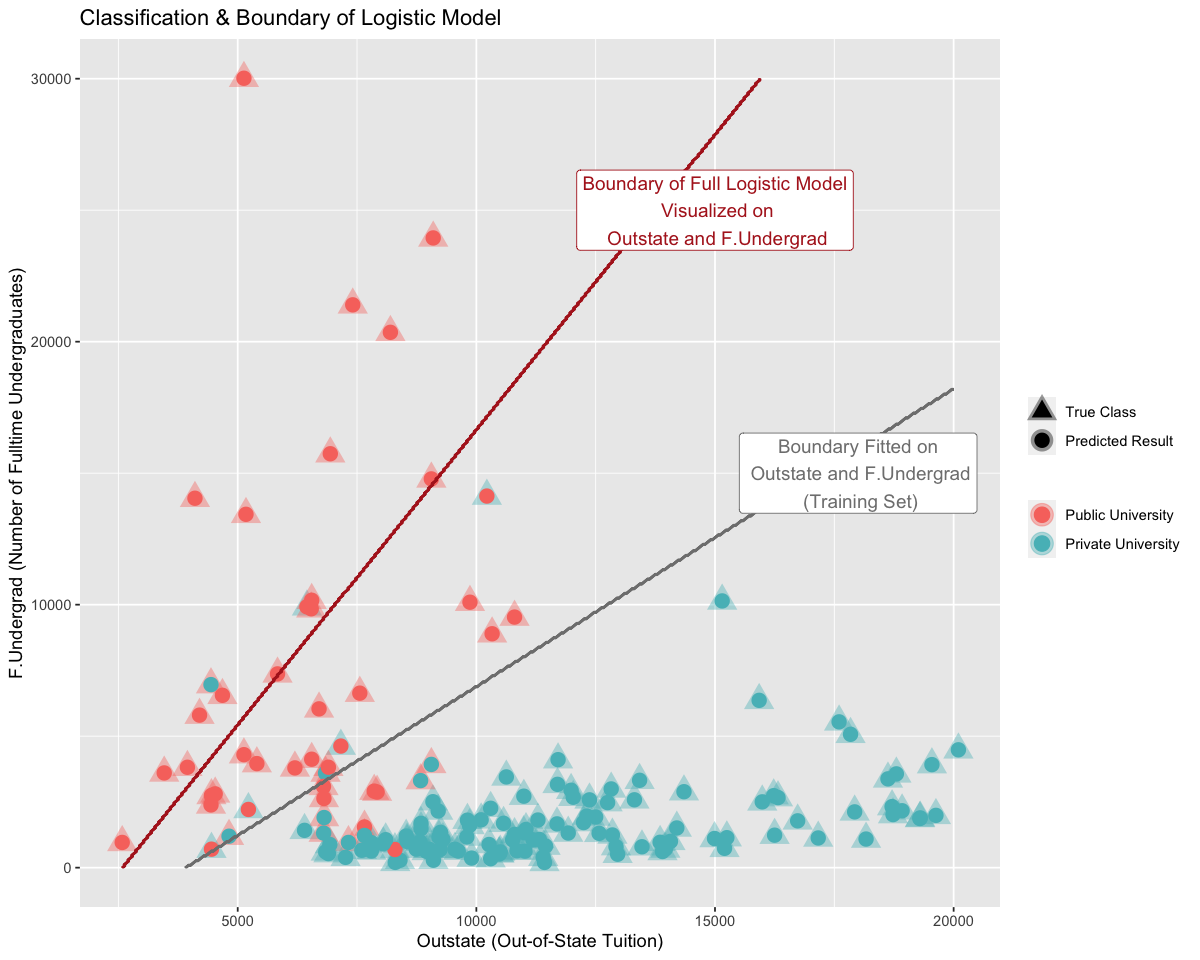

In [38]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot() +
    geom_point(data = logit.variable.res, 
               mapping = aes(x = Outstate, y = F.Undergrad, color = Private, shape = "triangle"), 
               alpha = 0.4, size = 6) + 
    geom_point(data = logit.variable.res, 
               mapping = aes(x = Outstate, y = F.Undergrad, color = Prediction, shape = "circle"), 
               alpha = 1, size = 4) + 
    scale_color_manual(values = c("#F8766D", "#56BCC2"), name = NULL,
                       breaks = c("No", "Yes"), labels = c("Public University", "Private University")
                      ) + 
    scale_shape_manual(values = c(17, 16), name = NULL,
                       breaks = c("triangle", "circle"), labels = c("True Class", "Predicted Result")
                      ) +
    xlab("Outstate (Out-of-State Tuition)") + 
    ylab("F.Undergrad (Number of Fulltime Undergraduates)") + 
    geom_contour(mapping = aes(x = grid.2var$Outstate, y = grid.2var$F.Undergrad, 
                               z = as.numeric(logit.2var.pred.grid)),
                 color = "gray50") + 
    geom_label(aes(x = 18000, y = 15000, 
                   label = "Boundary Fitted on\n Outstate and F.Undergrad\n (Training Set)"), 
               color = "gray50", size = 4) + 
    geom_contour(mapping = aes(x = grid.full$Outstate, y = grid.full$F.Undergrad, 
                               z = as.numeric(logit.full.pred.grid)),
                 color = "firebrick") + 
    geom_label(aes(x = 15000, y = 25000, 
                   label = "Boundary of Full Logistic Model\n Visualized on\n Outstate and F.Undergrad"), 
               color = "firebrick", size = 4) + 
    ggtitle("Classification & Boundary of Logistic Model")

The boundary of logistic model is similar to LDA. It is also a line in the Outstate-F.Undergrad plane. We can see that there are some points labeled red lying right-hand side of the logistic model boundary. The same reason as the LDA model might be able to explain: the boundary hyperplane is not orthogonal to the Outstate-F.Undergrad plane.